# Will a Customer Accept the Coupon?

Predicting Coupon Acceptance by Customers

Context

Imagine receiving a coupon on your cell phone for a restaurant near your current location while driving through town. Would you take a short detour to use the coupon at the restaurant? Or would you save the coupon for a subsequent visit? Perhaps you might choose to ignore the coupon entirely. Now, what if the coupon was for a bar or a coffee house instead? Would the presence of a minor passenger in the car impact your acceptance of a bar coupon? How about if you were driving with your partner? Does weather or time of day influence your likelihood of accepting the coupon?

While proximity to the business plays a role in coupon delivery to drivers, there are various factors that determine whether a driver accepts the coupon once received. The goal of this project is to leverage visualizations and probability distributions to distinguish between customers who accept a driving coupon and those who do not.

Data

The data for this project comes from the UCI Machine Learning repository and was gathered through a survey on Amazon Mechanical Turk. The survey presented different driving scenarios, including destination, current time, weather, passenger type, etc., and asked respondents whether they would accept the coupon as the driver. Responses indicating acceptance "right away" or "later before the coupon expires" are labeled as 'Y = 1', while responses stating "no, I do not want the coupon" are labeled as 'Y = 0'. The coupons provided are categorized into five types: less expensive restaurants (under $20), coffee houses, carry out & take away, bars, and more expensive restaurants ($20 - $50).

Deliverables

The final deliverable will be a concise report highlighting the distinctions between customers who accepted and those who declined the coupons. Python will be utilized to explore the data through plotting, statistical summaries, and visualization. The findings will be published in a publicly accessible GitHub repository as part of the first portfolio piece.

Data Description

Keep in mind that the following values are averages.

User Attributes:

    Gender: male, female
    Age: below 21, 21 to 25, 26 to 30, etc.
    Marital Status: single, married partner, unmarried partner, or widowed
    Number of children: 0, 1, or more than 1
    Education: high school, bachelor's degree, associate's degree, or graduate degree
    Occupation: architecture & engineering, business & financial, etc.
    Annual income: less than $12,500, $12,500 - $24,999, $25,000 - $37,499, etc.
    Number of times going to a bar: 0, less than 1, 1 to 3, 4 to 8, or greater than 8
    Number of times buying takeaway food: 0, less than 1, 1 to 3, 4 to 8, or greater than 8
    Number of times going to a coffee house: 0, less than 1, 1 to 3, 4 to 8, or greater than 8
    Number of times eating at a restaurant with an average expense less than $20 per person: 0, less than 1, 1 to 3, 4 to 8, or greater than 8
    Number of times going to a bar: 0, less than 1, 1 to 3, 4 to 8, or greater than 8

Contextual Attributes:

    Driving destination: home, work, or no urgent destination
    Location of user, coupon, and destination: geographical location with driving time/distance information
    Weather: sunny, rainy, or snowy
    Temperature: 30°F, 55°F, or 80°F
    Time: 10 AM, 2 PM, or 6 PM
    Passenger: alone, partner, kid(s), or friend(s)

Coupon Attributes:

    Time before it expires: 2 hours or one day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
plt.style.use('ggplot')
pd.set_option("display.max_columns", 200)

# Challenges

To initiate your data analysis, follow the guidelines below:

    1. Import the data from the "coupons.csv" file.

In [2]:
# Read a csv file and display the top 15 rows
df = pd.read_csv("C:/Users/fabia/OneDrive/Desktop/coupons.csv")
df.head(15)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Explore the Dataset 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

# Data Cleaning

During the data cleaning process, we will thoroughly inspect the dataset for potential issues, such as:

    Empty cells
    Data in the incorrect format
    Incorrect or inaccurate data
    Duplicate entries

In [4]:
# count null valaues in each column using isnull
df.isnull().sum(axis = 0)

# Observation: 
# The following rows has null values that needs to cleaned up
# car                     12576
# Bar                       107
# CoffeeHouse               217
# CarryAway                 151
# RestaurantLessThan20      130
# Restaurant20To50          189

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
# print the unique values in the Car column
df.car.value_counts()

# Output:
# Scooter and motorcycle                      22
# Mazda5                                      22
# do not drive                                22
# crossover                                   21
# Car that is too old to install Onstar :D    21

# Observation: 
# 1. There is no valid pattern to infer the data for the Car column 
# 2. More then ~99% of the values are null in this column
# Conclusion:
# 1. Drop the Car column in Qn.3

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [6]:
# Verify that direction_same and direction_opposite are mutually exclusive
df.query('direction_same == direction_opp')

# Observation:
# 1. There are no overlaps where both "direction_same" and "direction_opp" have the same value

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


In [7]:
# Typecast weather to lowercase to make the query simpler
df['weather'] = df['weather'].str.lower()

# Query to find rows where weather is "sunny" and temperature is not 80
df.query('(weather == "sunny") and (temperature !=80)')

# Observation:
# 1. There are 3541 rows for sunny weather that don't have a temperature of 80, indicating a disconnect between weather and temperature.

# Conclusion:
# 1. Attempting to fix the weather data by matching the weather to the temperature.
# 2. The assumption made here is that the temperature is correct, and the weather value mapping to temperature is incorrect.
# 3. This assumption is based on the value count of the weather column, where more than 95% of the values were "Sunny," indicating possible bias in this column.

# Output of weather value counts before the update
df.weather.value_counts()
# Output:
# sunny    10069
# snowy    1405
# rainy    1210

# Function to update weather based on temperature
def update_weather(temperature, weather):
    value = ""
    if temperature == 30:
        value = "snow"
    elif temperature == 55:
        value = "rain"
    else:
        value = "sunny"
    return value

# Update weather column based on temperature
df['weather'] = df.apply(lambda x: update_weather(x['temperature'], x['weather']), axis=1)


# Display the last 10 rows of the updated DataFrame
df.tail(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12674,Home,Alone,rain,55,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,snow,30,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12676,Home,Alone,sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,snow,30,6PM,Restaurant(<20),1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,1
12678,Home,Partner,snow,30,10PM,Restaurant(<20),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,1,0,0
12679,Home,Partner,rain,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,rain,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,snow,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,snow,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0


In [8]:
import re

# Function to convert the duration format to hours
def convert_to_hours(duration):
    pattern = r'(\d+)([dh])'
    matches = re.findall(pattern, duration)
    
    total_hours = 0
    
    for match in matches:
        value = int(match[0])
        unit = match[1]
        
        if unit == 'd':
            total_hours += value * 24
        elif unit == 'h':
            total_hours += value
            
    return total_hours

# Convert the 1d, 2h, etc., durations to hours and store them into the "expiration_hours" column
df['expiration_hours'] = df['expiration'].apply(convert_to_hours)
df.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,expiration_hours
0,No Urgent Place,Alone,rain,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1,24
1,No Urgent Place,Friend(s),sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0,2


3. Decide what to do about your missing data -- drop, replace, other

In [9]:
# removing car column since it has too many null values and not enough data to enrich the column
del df['car']

In [10]:
# Value count for Bar Column
df.Bar.value_counts()

# Outputs:
# never    5197
# less1    3482
# 1~3      2473
# 4~8      1076
# gt8       349

# Observation - 
# 1. There are values missing in the Bar column
# Fix - 
# 1. "never" is the most frequently occuring value for this column, based on the finding I am filling the columns with null 
# with the value "never"

df["Bar"].fillna("never", inplace = True) 

In [11]:
# Explore other columns with null values
coffeehouse_counts = df['CoffeeHouse'].value_counts()
carryaway_counts = df['CarryAway'].value_counts()
restaurant_less_than_20_counts = df['RestaurantLessThan20'].value_counts()
restaurant_20_to_50_counts = df['Restaurant20To50'].value_counts()

# Observations:
# 1. The above columns have missing values

# Fix:
# 1. Instead of filling with the most frequent values, for these columns, the inbuilt backfill method is used to fill the missing values
df = df.fillna(method='bfill')

In [12]:
# Adding friendly values in the column
# Convert Y column Y=1 to Y="accepted coupon" and Y=0 to Y="not accepted coupon"
df["Y_String"] = np.where(df["Y"] == 1, "accepted coupon", "not accepted coupon")

In [13]:
# Merging columns based on condition
# Convert the direction column to a single column with direction = Same or Opposite
# The user can see whether the venue is in the same direction as the destination.

df['direction'] = df['direction_same'].apply(lambda x: 'Same' if x == 1 else 'Opposite')
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,expiration_hours,Y_String,direction
12679,Home,Partner,rain,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,1,24,accepted coupon,Same
12680,Work,Alone,rain,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1,24,accepted coupon,Opposite
12681,Work,Alone,snow,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0,24,not accepted coupon,Same
12682,Work,Alone,snow,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,1,0,1,0,24,not accepted coupon,Opposite
12683,Work,Alone,sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0,2,not accepted coupon,Same


4. What percentage of the total observations accepted the coupon?

In [14]:
df.Y.value_counts()
# Output : 
# 7210 - Accepted coupon
# 5474 - Did not accept coupon 

count = df.groupby(['Y']).agg({'Y': 'count'}).reset_index(drop=True)
percent = (count['Y'] / count['Y'].sum()) * 100
print(f"Coupon Acceptance rate: {percent[0]:.2f}")
print(f"Coupon Rejection rate: {percent[1]:.2f}")

# Output:
# Coupon Acceptance rate: 43.16
# Coupon Rejection rate: 56.84

Coupon Acceptance rate: 43.16
Coupon Rejection rate: 56.84


5. Use a bar plot to visualize the coupon column.

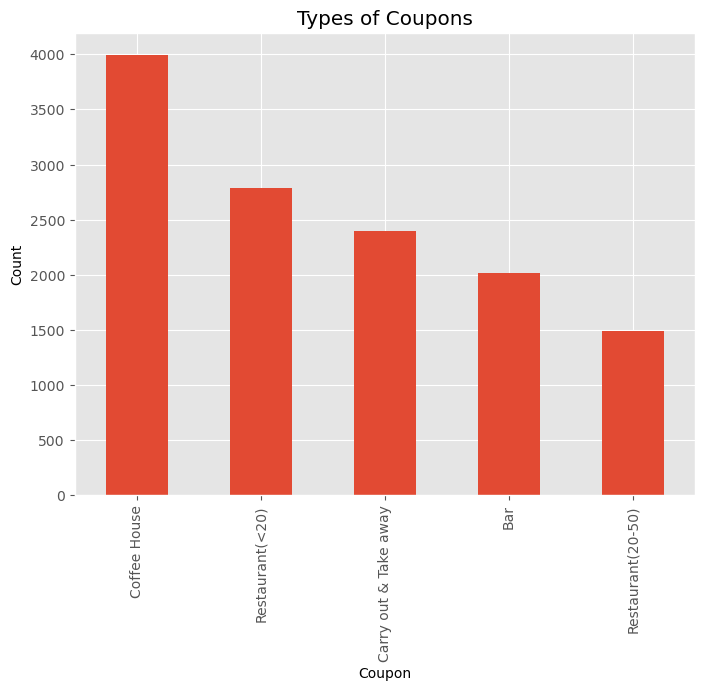

In [15]:
# Count the occurrences of each coupon type
coupon_counts = df['coupon'].value_counts()

# Create a bar plot
ax = coupon_counts.plot(kind='bar', figsize=(8, 6))

# Set the labels and title
ax.set_xlabel('Coupon')
ax.set_ylabel('Count')
ax.set_title('Types of Coupons')

# Show the plot
plt.show()

6. Let's use a histogram to visualize the distribution of temperatures:

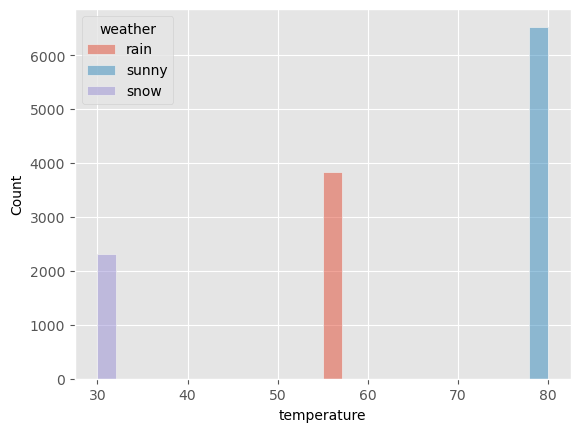

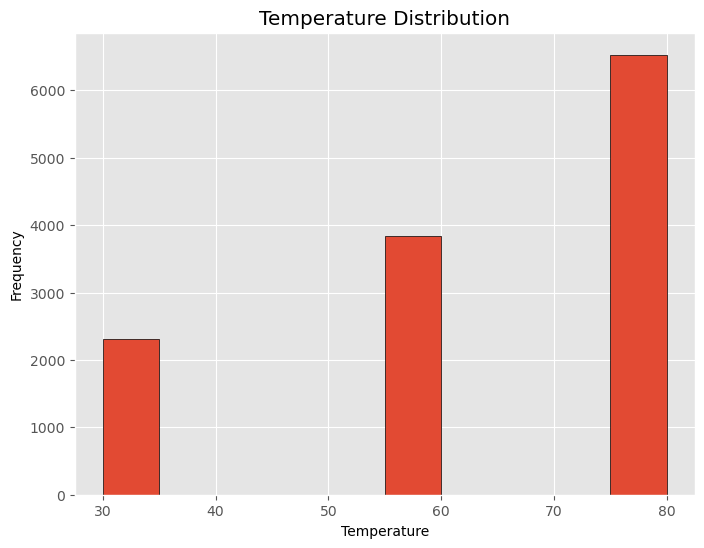

In [16]:
# Create a histogram of the 'temperature' column using seaborn
sns.histplot(data=df, x="temperature", hue="weather")
plt.figure(figsize=(8, 6))
plt.hist(df['temperature'], bins=10, edgecolor='black')

# Set the labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

# Show the plot
plt.show()

# Observation 
# 1. Since the weather data was updated to match the temperature they are appearing in the correct buckets. 

# Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.

    1. Create a new DataFrame that contains just the bar coupons.

In [17]:
# Dataframe that contains Bar coupons 
barcoupons_df = df[df['coupon'].str.contains("Bar")]
barcoupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,expiration_hours,Y_String,direction
9,No Urgent Place,Kid(s),sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,1,0,0,1,0,24,not accepted coupon,Opposite
13,Home,Alone,rain,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,0,0,1,0,1,24,accepted coupon,Same
17,Work,Alone,rain,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,1,1,0,1,0,24,not accepted coupon,Opposite
24,No Urgent Place,Friend(s),sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1,24,accepted coupon,Opposite
35,Home,Alone,rain,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1,24,accepted coupon,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,24,not accepted coupon,Opposite
12664,No Urgent Place,Friend(s),rain,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,2,not accepted coupon,Opposite
12667,No Urgent Place,Alone,rain,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,24,not accepted coupon,Opposite
12670,No Urgent Place,Partner,rain,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,2,not accepted coupon,Opposite


2. What proportion of bar coupons were accepted?

In [18]:
count = barcoupons_df.groupby(['Y']).agg({'Y': 'count'}).reset_index(drop=True)
percent = (count['Y'] / count['Y'].sum()) * 100
print("Percentage of Accepted Coupon = ", percent[0])
print("Percentage of Not Accepted Coupon = ", percent[1]) 

# output:
# Percentage of Accepted Coupon =  
# Percentage of Not Accepted Coupon =  

Percentage of Accepted Coupon =  58.99851264253842
Percentage of Not Accepted Coupon =  41.00148735746158


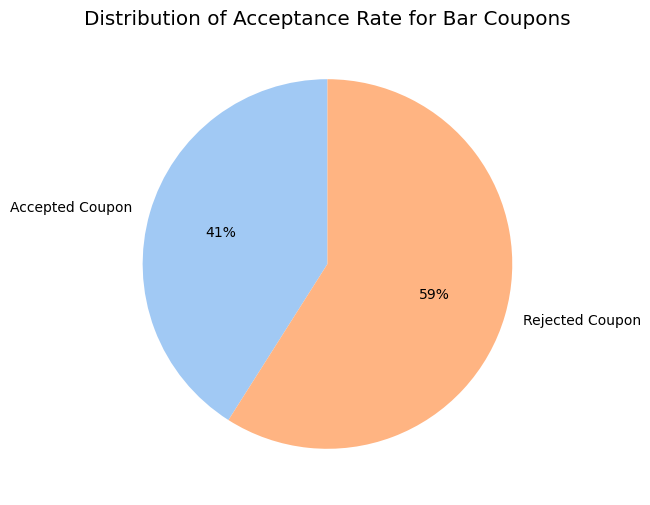

In [19]:
# Define data
data = [barcoupons_df.query("Y==1").shape[0], barcoupons_df.query("Y==0").shape[0]]
labels = ['Accepted Coupon', 'Rejected Coupon']

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)

# Set the title
plt.title('Distribution of Acceptance Rate for Bar Coupons')

# Show the plot
plt.show()

3. Let's compare the acceptance rate between customers who went to a bar 3 or fewer times a month and those who went more:

In [20]:
# Observation - Since the bucketing of the bar is "1-3" and "4-8", we cannot evaluate for 3 or more
# Conclusion - To work around the problem the evaluaion is made for 4 or more visits 


# Check for the qualifying condition
def qualifying_condition(bar):
    if (bar in ["4~8", "gt8"]):
        return True 
    else:
        return False

# Apply the qualifying condition to the dataframe
df['qualifying_condition_qn3'] = df.apply(lambda x: qualifying_condition(x['Bar']), axis=1)

# Filter data for accepted bar coupons
accepted_barcoupons_df = df[df['coupon'].str.contains("Bar")].query("Y==1")

# Calculate acceptance rates for those who went to a bar 3 or more times and less than 3 times
accepted_by_more_than_3 = (accepted_barcoupons_df.query("qualifying_condition_qn3 == 1").shape[0] / accepted_barcoupons_df.shape[0]) * 100
accepted_by_less_than_3 = (accepted_barcoupons_df.query("qualifying_condition_qn3 == 0").shape[0] / accepted_barcoupons_df.shape[0]) * 100

print(f"Acceptance rate for those who went to a bar 3 or more times: {accepted_by_more_than_3:.2f}%")
print(f"Acceptance rate for those who went to a bar less than 3 times: {accepted_by_less_than_3:.2f}%")

# Observation:
# People who go to the bar more often are less likely to accept a coupon.


Acceptance rate for those who went to a bar 3 or more times: 18.50%
Acceptance rate for those who went to a bar less than 3 times: 81.50%


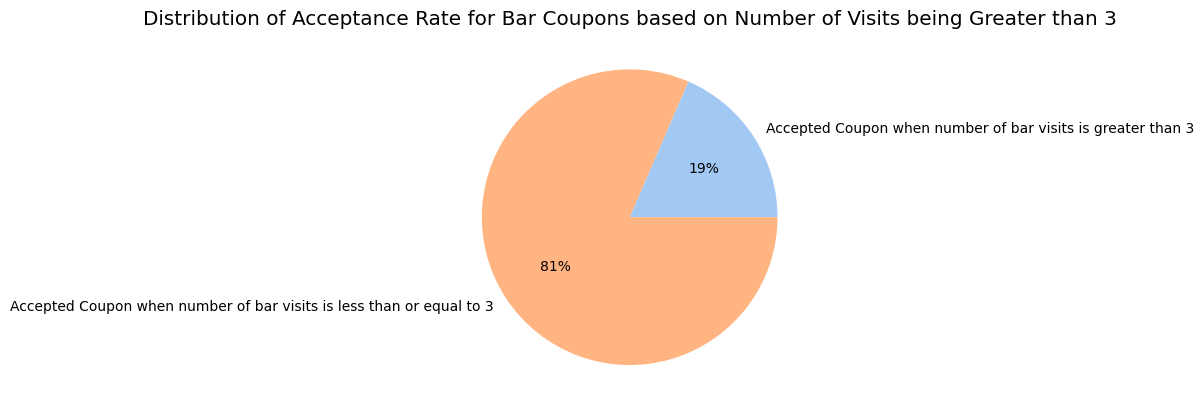

In [21]:
# Define data for the pie chart
data = [
    accepted_barcoupons_df.query("qualifying_condition_qn3 == 1").shape[0],
    accepted_barcoupons_df.query("qualifying_condition_qn3 == 0").shape[0]
]

# Define labels for the pie chart
labels = [
    'Accepted Coupon when number of bar visits is greater than 3',
    'Accepted Coupon when number of bar visits is less than or equal to 3'
]

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Distribution of Acceptance Rate for Bar Coupons based on Number of Visits being Greater than 3')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all others. Is there a difference?

In [22]:
#Data cleanup for Age field 
df['age'] = df['age'].apply(lambda x: "50" if x == "50plus" else x)
df['age'] = df['age'].apply(lambda x: "21" if x == "below21" else x)
df['age'] = df['age'].astype(int)

In [23]:
# check for the qualifying condition 
def qualifying_condition(age, bar):
    if ((age >25) and (bar in["1~3","4~8","gt8"])):
        return True 
    else:
        return False
    
df['qualifying_condition_qn4'] = df.apply(lambda x: qualifying_condition(x['age'], x['Bar']), axis=1)

barcoupons_df = df[df['coupon'].str.contains("Bar")]

accepted_by_qualifying_group = (barcoupons_df.query("Y==1 and qualifying_condition_qn4 == 1").shape[0] / barcoupons_df.shape[0]) * 100
accepted_by_everyone = (barcoupons_df.query("Y==1").shape[0] / barcoupons_df.shape[0]) * 100

print(f"Accepted Bar Coupon by Qualifying group = {accepted_by_qualifying_group:.2f}%")
print(f"Accepted Bar Coupon by Everyone = {accepted_by_everyone:.2f}%")

# Observation 
# 1. The Bar coupons has an overall acceptance rate of 41%
# 2. Out of the 41% acceptance rate for bar coupons ~14% of them visited bars more then once and were over the age of 25

Accepted Bar Coupon by Qualifying group = 14.48%
Accepted Bar Coupon by Everyone = 41.00%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [24]:
# check for the qualifying condition 
def qualifying_condition(occupation, bar, passanger):
    if (occupation != "Farming Fishing & Forestry") and (bar in["1~3","4~8","gt8"]) and (passanger not in ["Alone","Kid(s)"]):
        return True 
    else:
        return False

df['qualifying_condition_qn5'] = df.apply(lambda x: qualifying_condition(x['occupation'], x['Bar'], x['passanger']), axis=1)

# ------> Debugging help <---------
#barcoupons_df.qualifying_condition_qn6.value_counts()
#barcoupons_df.shape[0]
# ------> Debugging help <---------

barcoupons_df = df[df['coupon'].str.contains("Bar")].query("qualifying_condition_qn5 == 1") 
accepted_coupon = (barcoupons_df.query("Y==1").shape[0] / barcoupons_df.shape[0]) * 100
rejected_coupon = (barcoupons_df.query("Y==0").shape[0] / barcoupons_df.shape[0]) * 100

print("Condition -> Visits bar more then once, occupation is not Farming Fishing & Forestry and travels with passenger who is not a child")
print(f"Dataset size for the condition = {barcoupons_df.shape[0]}")
print(f"Accepted Bar Coupon = {accepted_coupon:.2f}%")
print(f"Rejected Bar Coupon = {rejected_coupon:.2f}%")

# Output 
# Condition -> Visits bar more then once, occupation is not Farming Fishing & Forestry and travels with passenger who is not a child
# Dataset size for the condition = 195
# Accepted Bar Coupon = 71.79%
# Rejected Bar Coupon = 28.21%

Condition -> Visits bar more then once, occupation is not Farming Fishing & Forestry and travels with passenger who is not a child
Dataset size for the condition = 195
Accepted Bar Coupon = 71.79%
Rejected Bar Coupon = 28.21%


6. Compare the acceptance rates of drivers under different conditions:

    Drivers who visit bars more than once a month, have passengers who are not kids, and are not widowed.
    Drivers who visit bars more than once a month and are under the age of 30.
    Drivers who visit cheap restaurants more than 4 times a month and have an income less than 50K.

In [25]:
# check for the qualifying condition
def qualifying_condition(bar, passanger, maritalStatus, age, RestaurantLessThan20, income):
    if ((bar in ["1~3", "4~8", "gt8"]) and (passanger not in ["Alone", "Kid(s)"]) and (maritalStatus != "Widowed")) or ((bar in ["1~3", "4~8", "gt8"] and age < 30) or (RestaurantLessThan20 in ["4~8", "gt8"]) and (income in ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"])):
        return True
    else:
        return False

df['qualifying_condition_qn6'] = df.apply(lambda x: qualifying_condition(x['Bar'], x['passanger'], x['maritalStatus'], x['age'], x['RestaurantLessThan20'], x['income']), axis=1)

barcoupons_df = df[df['coupon'].str.contains("Bar")].query("qualifying_condition_qn6 == 1") 
accepted_coupon = (barcoupons_df.query("Y==1").shape[0] / barcoupons_df.shape[0]) * 100
rejected_coupon = (barcoupons_df.query("Y==0").shape[0] / barcoupons_df.shape[0]) * 100

print("Condition -> Q6")
print(f"Dataset size for the condition = {barcoupons_df.shape[0]}")
print(f"Accepted Bar Coupon = {accepted_coupon:.2f}%")
print(f"Rejected Bar Coupon = {rejected_coupon:.2f}%")

Condition -> Q6
Dataset size for the condition = 671
Accepted Bar Coupon = 56.93%
Rejected Bar Coupon = 43.07%


7. Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Observations:

    - The overall acceptance rate for any coupon is 43.16%.
    - The acceptance rate for a Bar coupon is 41.00%.
    - Acceptance rate for those who go to a bar 3 or more times is 19%.
    - Acceptance rate for those who go to the bar more than once a month and are over the age of 25 is 14.58%.
    - Acceptance rate for those who go to the bar more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry is 71.79%.
    - Acceptance rate for those who are young, single, and starting their career (lower income) is 59%.

# Conclusions:

    - Overall, the bar coupon's acceptance rate is on par with other types of coupons.
    
    - Targeting individuals who frequent bars more often might not be effective.
    
    - Having a kid in the car is a deterrent to accepting the coupon, indicating responsible driving behavior.

# Further Investigation Required:

    - Determine if the length of the day influences bar coupon acceptance, especially during winters when it gets darker earlier.
    
    - Investigate how the expiration duration of the coupon affects the acceptance rate. For example, does a longer expiration time lead to higher acceptance rates?

# Not Enough Data:

- Explore the value and type of the bar coupon to see if specific offers perform better, such as "buy 1 get 1 drink free" compared to "10% off a drink."

# Independent Investigation:

- Use one of the other coupon groups and analyze the characteristics of passengers who accept those coupons.

In [26]:
# Exploring Coffee House Coupons, the Most Common Coupon

# Count the occurrences of each coupon type
df1 = df['coupon'].value_counts()

# Dataframe that contains Coffee House coupons
coffeecoupons_df = df[df['coupon'].str.contains("Coffee")]
coffeecoupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,expiration_hours,Y_String,direction,qualifying_condition_qn3,qualifying_condition_qn4,qualifying_condition_qn5,qualifying_condition_qn6
1,No Urgent Place,Friend(s),sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,0,0,0,1,0,2,not accepted coupon,Opposite,False,False,False,True
3,No Urgent Place,Friend(s),sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,1,0,0,1,0,2,not accepted coupon,Opposite,False,False,False,True
4,No Urgent Place,Friend(s),sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,1,0,0,1,0,24,not accepted coupon,Opposite,False,False,False,True
12,No Urgent Place,Kid(s),rain,55,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,1,0,0,1,1,2,accepted coupon,Opposite,False,False,False,True
15,Home,Alone,sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,4~8,1~3,1,0,0,0,1,0,2,not accepted coupon,Opposite,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,snow,30,10PM,Coffee House,2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,1,1,0,0,1,0,2,not accepted coupon,Opposite,False,False,False,False
12659,Work,Alone,snow,30,7AM,Coffee House,1d,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,1,0,0,1,0,0,24,not accepted coupon,Same,False,False,False,False
12674,Home,Alone,rain,55,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0,2,not accepted coupon,Same,False,False,False,False
12675,Home,Alone,snow,30,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0,2,not accepted coupon,Opposite,False,False,False,False


In [27]:
# Calculate Acceptance Rate for Coffee Coupons
count = coffeecoupons_df.groupby(['Y']).agg({'Y': 'count'}).reset_index(drop=True)
percent_accepted = (count['Y'][0] / count['Y'].sum()) * 100
percent_not_accepted = (count['Y'][1] / count['Y'].sum()) * 100

print("Percentage of Accepted Coupons = {:.2f}%".format(percent_accepted))
print("Percentage of Not Accepted Coupons = {:.2f}%".format(percent_not_accepted))

Percentage of Accepted Coupons = 50.08%
Percentage of Not Accepted Coupons = 49.92%


The code calculates the acceptance rate for coffee coupons based on age, gender, and marital status.